## Data Loading ##

In [ ]:
!pip install openpyxl

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-02-22 11:18:24--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [      <=>           ]  22.62M  21.7MB/s    in 1.0s    

2025-02-22 11:18:25 (21.7 MB/s) - ‘online+retail.zip’ saved [23715478]



In [4]:
!unzip online+retail.zip

Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


In [5]:
df1 = pd.read_excel("Online Retail.xlsx", dtype={'InvoiceNo': 'string', 'StockCode': 'string', 'Description': 'string', 'Country': 'string'})
df1.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


## Data Cleaning ##

In [7]:
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [8]:
df1.duplicated().sum()

5268

In [9]:
df1[df1.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [10]:
df1[df1['Description'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [11]:
df1[df1.StockCode=='84581'].Description.mode()

,Description
0,DOG TOY WITH PINK CROCHET SKIRT


In [12]:
most_freq = df1.groupby('StockCode')['Description'].agg(pd.Series.mode).reset_index()
most_freq.columns = ['StockCode', 'New_Description']
most_freq

,StockCode,New_Description
0,10002,INFLATABLE POLITICAL GLOBE
1,10080,GROOVY CACTUS INFLATABLE
2,10120,DOGGY RUBBER
3,10123C,HEARTS WRAPPING TAPE
4,10123G,[]
...,...,...
4065,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00
4066,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00
4067,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00
4068,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00


In [13]:
df2 = df1.merge(most_freq, on='StockCode', how='left')
df2[df2.StockCode=='84581']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,New_Description
1823,536544,84581,DOG TOY WITH PINK CROCHET SKIRT,1,2010-12-01 14:32:00,4.21,NaN,United Kingdom,DOG TOY WITH PINK CROCHET SKIRT
7105,536988,84581,DOG TOY WITH PINK CROCHET SKIRT,1,2010-12-03 15:05:00,3.75,17238.0,United Kingdom,DOG TOY WITH PINK CROCHET SKIRT
7694,537050,84581,DOG TOY WITH PINK CROCHET SKIRT,1,2010-12-05 11:10:00,3.75,14800.0,United Kingdom,DOG TOY WITH PINK CROCHET SKIRT
13836,537434,84581,DOG TOY WITH PINK CROCHET SKIRT,1,2010-12-06 16:57:00,4.21,NaN,United Kingdom,DOG TOY WITH PINK CROCHET SKIRT
16697,537666,84581,DOG TOY WITH PINK CROCHET SKIRT,1,2010-12-07 18:36:00,4.21,NaN,United Kingdom,DOG TOY WITH PINK CROCHET SKIRT
...,...,...,...,...,...,...,...,...,...
517398,580054,84581,DOG TOY WITH PINK CROCHET SKIRT,2,2011-12-01 13:08:00,3.75,18122.0,United Kingdom,DOG TOY WITH PINK CROCHET SKIRT
518666,580115,84581,DOG TOY WITH PINK CROCHET SKIRT,1,2011-12-01 16:22:00,4.13,NaN,United Kingdom,DOG TOY WITH PINK CROCHET SKIRT
522023,580367,84581,DOG TOY WITH PINK CROCHET SKIRT,1,2011-12-02 16:39:00,4.13,NaN,United Kingdom,DOG TOY WITH PINK CROCHET SKIRT
524127,580529,84581,DOG TOY WITH PINK CROCHET SKIRT,2,2011-12-04 15:35:00,3.75,14658.0,United Kingdom,DOG TOY WITH PINK CROCHET SKIRT


In [14]:
df2['Description'] = df2['New_Description']

In [15]:
df2.drop('New_Description', axis=1, inplace=True)
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [16]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [17]:
df2[df2.UnitPrice==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,RETROSPOT TEA SET CERAMIC 11 PC,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,[],1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,CHRISTMAS CRAFT HEART STOCKING,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NEW ENGLAND MUG W GIFT BOX,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,[],1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,SET OF 2 CHRISTMAS DECOUPAGE CANDLE,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,CACTI T-LIGHT CANDLES,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


In [18]:
df2.drop(df2[df2.UnitPrice==0].index, inplace=True)

In [19]:
df3 = df2[(df2.Quantity > 0) & (df2.UnitPrice > 0)]
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


In [20]:
import numpy as np

In [21]:
rep_cust_array = np.random.choice(df3.CustomerID.unique(),df3.CustomerID.isna().sum())
rep_cust = pd.DataFrame(rep_cust_array, columns=['cust'])

In [22]:
df3.loc[df3.CustomerID.isna(), 'CustomerID'] = rep_cust['cust'].values
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  string        
 1   StockCode    530104 non-null  string        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   530076 non-null  float64       
 7   Country      530104 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1), string(3)
memory usage: 36.4+ MB


## Feature Engineering ##

In [23]:
df4 = df3.copy()
df4['Total_Sales'] = df4['Quantity'] * df4['UnitPrice']
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [24]:
df4['Month'] = df4['InvoiceDate'].dt.month
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


## Visualization & EDA ##

### 1. Plot Monthly Sales ###

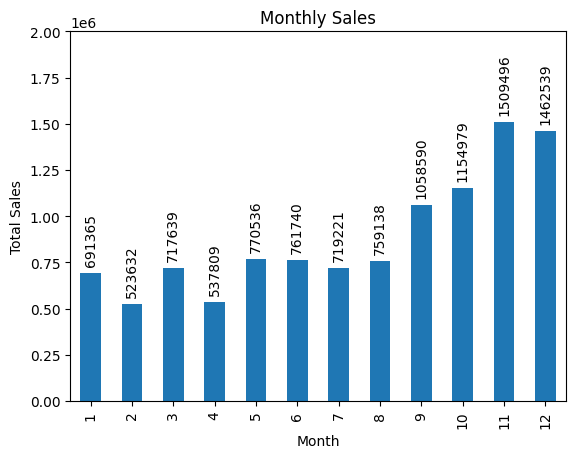

In [25]:
ax = df4.groupby('Month')['Total_Sales'].sum().plot(kind='bar', title='Monthly Sales')
plt.ylabel('Total Sales')
plt.ylim(0,2000000)

for bars in ax.containers:
  ax.bar_label(bars, fmt='%.0f', padding=5, rotation = 'vertical', fontsize=10)

### 2. Top 5 Countries ###

In [26]:
country_wise_sales = df4.groupby('Country')['Total_Sales'].sum().round(2).sort_values(ascending=False).reset_index()
country_wise_sales['Percentage'] = 100*(country_wise_sales['Total_Sales'] / country_wise_sales['Total_Sales'].sum())
top5 = country_wise_sales.head(5)
top5

,Country,Total_Sales,Percentage
0,United Kingdom,9025222.08,84.611315
1,Netherlands,285446.34,2.676055
2,EIRE,283453.96,2.657376
3,Germany,228867.14,2.145626
4,France,209715.11,1.966076


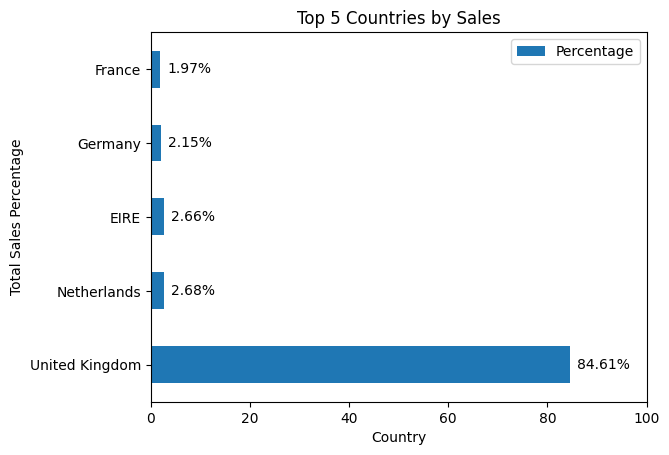

In [27]:
ax = top5.plot(kind='barh', x='Country', y='Percentage', title='Top 5 Countries by Sales')
plt.ylabel('Total Sales Percentage')
plt.xlabel('Country')

for bars in ax.containers:
  ax.bar_label(bars, fmt='%.2f%%', padding=5, rotation = 'horizontal', fontsize=10)

plt.xlim(0,100)
plt.show()

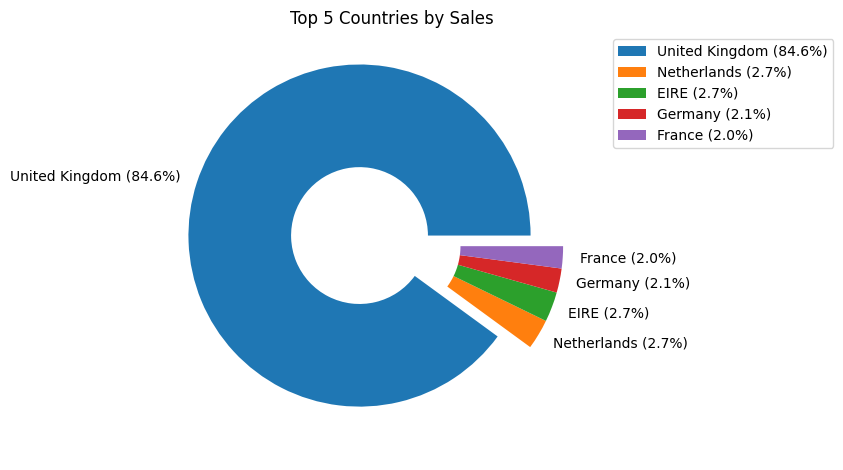

In [41]:
labels = [f"{country} ({percent:.1f}%)" for country, percent in zip(top5['Country'], top5['Percentage'])]

plt.pie(
    top5['Total_Sales'],
    labels=labels,
    explode=[0.2, 0, 0, 0, 0],
    wedgeprops={'width': 0.6}
)

plt.title('Top 5 Countries by Sales')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1, 1))
plt.show()


### 3. Top 10 Products ##

In [60]:
top_10_prod=df4.groupby('StockCode')['Total_Sales'].sum().sort_values(ascending=False).astype('int').head(10).reset_index()
top_10_prod

,StockCode,Total_Sales
0,DOT,206248
1,22423,174484
2,23843,168469
3,85123A,104518
4,47566,99504
5,85099B,94340
6,23166,81700
7,M,78110
8,POST,78101
9,23084,66964


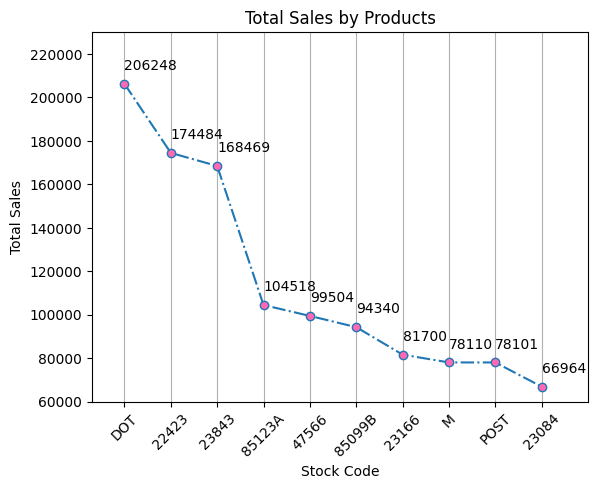

In [125]:
plt.plot(top_10_prod.StockCode,top_10_prod.Total_Sales, 'o-.', mfc='hotpink')
plt.xlabel('Stock Code')
plt.ylabel('Total Sales')
plt.title('Total Sales by Products')
plt.grid(axis='x')
plt.xticks(rotation=45)
plt.ylim(60000,230000)
plt.xlim(-0.7,10)


for i, txt in enumerate(top_10_prod['Total_Sales']):
    plt.annotate(txt, (top_10_prod['StockCode'][i], txt), textcoords="offset points", xytext=(0,10), ha='left')

plt.show()

### 4. RFM Analysis ###

In [130]:
current_date = df4["InvoiceDate"].max()+pd.Timedelta(days=1)
current_date

Timestamp('2011-12-10 12:50:00')

In [171]:
rfm = df4.groupby('CustomerID').agg({
    "InvoiceDate" : lambda p: (current_date - p.max()).days,
    "InvoiceNo" : 'count',
    "Total_Sales" : 'sum'
    }).reset_index()
rfm.columns = ['CustomerID','Recency', 'Frequency', 'Monetary']
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,5,28,77445.01
1,12347.0,2,224,5222.58
2,12348.0,1,62,2433.84
3,12349.0,2,100,3418.08
4,12350.0,4,70,736.19
...,...,...,...,...
4333,18280.0,9,42,490.83
4334,18281.0,8,35,241.60
4335,18282.0,4,41,558.02
4336,18283.0,1,788,2423.13


In [197]:
rfm['R_Segment'] = pd.qcut(rfm['Recency'], 5, labels=[4, 3, 2, 1], duplicates='drop')
rfm['F_Segment'] = pd.qcut(rfm['Frequency'], 5, labels=[1, 2, 3, 4,5], duplicates='drop')
rfm['M_Segment'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4,5], duplicates='drop')
rfm['RFM_Score'] = rfm[['R_Segment', 'F_Segment', 'M_Segment']].sum(axis=1)

def assign_segment(score):
    if score >= 12:
        return "VIP"
    elif score >= 8:
        return "Loyal"
    elif score >= 5:
        return "Potential Loyalist"
    else:
        return "At Risk"

rfm['Segment'] = rfm['RFM_Score'].apply(assign_segment)
rfm.sample(3)


,CustomerID,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score,Segment
3745,17470.0,2,103,1310.07,4,4,3,11,Loyal
3428,17026.0,9,30,382.83,1,1,1,3,At Risk
1199,13974.0,7,62,1632.57,2,3,4,9,Loyal


### 5. Customer Churn Analysis ###

In [227]:
at_risk_custs = rfm[(rfm.Recency>=1) & (rfm.Segment=='At Risk')]
at_risk_custs

,CustomerID,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score,Segment
14,12361.0,14,32,309.15,1,1,1,3,At Risk
44,12402.0,14,44,771.30,1,1,2,4,At Risk
68,12430.0,14,43,544.76,1,1,1,3,At Risk
77,12441.0,7,38,591.59,2,1,1,4,At Risk
80,12445.0,4,29,374.24,2,1,1,4,At Risk
...,...,...,...,...,...,...,...,...,...
4325,18269.0,4,33,508.18,2,1,1,4,At Risk
4331,18277.0,4,45,421.72,2,1,1,4,At Risk
4333,18280.0,9,42,490.83,1,1,1,3,At Risk
4334,18281.0,8,35,241.60,1,1,1,3,At Risk


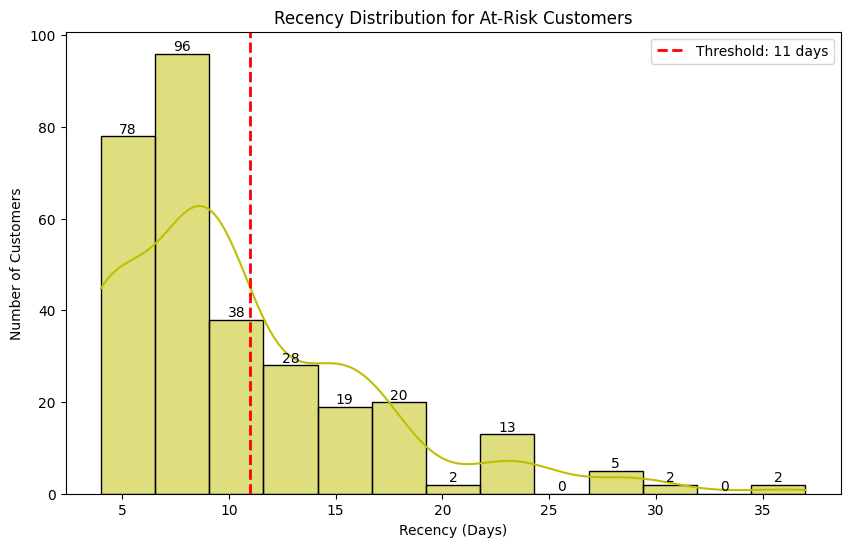

In [228]:
# prompt: now i want a histogram from x model with a threshhold line as 14

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
f = sns.histplot(at_risk_custs['Recency'], kde=True, color='y')
plt.axvline(11, color='red', linestyle='dashed', linewidth=2, label='Threshold: 11 days')
plt.xlabel('Recency (Days)')
plt.ylabel('Number of Customers')
plt.title('Recency Distribution for At-Risk Customers')
plt.legend()

for bars in f.containers:
  f.bar_label(bars)

plt.show()
